In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_row',500)
pd.options.display.max_columns = 150
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score

In [2]:
df_train=pd.read_csv('C:/Users/hp/Desktop/DSP/New folder (2)/Python/Credit risk/Preprocessed_Train_data.csv')

In [3]:
df_test=pd.read_csv('C:/Users/hp/Desktop/DSP/New folder (2)/Python/Credit risk/Preprocessed_Test_data.csv')

In [4]:
df_test.drop(['out_prncp','total_rec_prncp'],axis=1,inplace=True)
df_train.drop(['out_prncp','total_rec_prncp'],axis=1,inplace=True)

In [ ]:
#Initially the  model performed poorly giving accuracy as 4% since it was giving very high no. of false negatives
Confusion Matrix : 
 [[ 11244 245436]
 [     4    307]]
#From the above Confusion Matrix we can see that the model is classifying majority of the 0's as 1.
#Analysis- out_prncp was one of the major predictor which was misleading the model. out_prncp is zero for non defaulters and charged off loans
greater than zero for defaulters and although this condition is true in case of training data so our model performs well with train data.
But in case of test data which is the recent one and majority of the loans with default_ind=0 are current which means the loan is stillnot payed fully hence the
out_prncp for these loans are greater than zero 
Dropping out_prncp improved the performance and accuracy as 44%
#total_rec_prncp = loan amount for non defaulters but since our test data contains loans with default_ind=0 which are current 
so for test data total_rec_prncp < loan amount. dropped this variable and improved the accuracy to 74% 


In [5]:
X_train,y_train=df_train.drop(['default_ind'],axis=1),df_train['default_ind']

In [6]:
X_test,y_test=df_test.drop(['default_ind'],axis=1),df_test['default_ind']

In [190]:
df_test.head()

,default_ind,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,cred_hist_len_years
0,0,0.705882,0.0,0.000000,0.510655,0.000000,0.00,0.1,0.000000,0.741803,0.0,0.2,0.255710,0.0,0.0,0.000000,0.372090,0.0,0.663218,0.220207,0.084848,1.0,0.616041,0.000000,0.847510,0.665432,0.727273
1,0,0.500000,1.0,0.598226,0.311996,0.666667,0.84,0.7,0.666667,0.741803,0.0,0.4,0.254154,0.0,0.2,0.000000,0.604261,1.0,0.641759,0.210881,0.139394,1.0,0.534333,0.319914,0.685802,0.648262,0.636364
2,0,0.176471,0.0,0.091677,0.132548,0.000000,0.12,1.0,0.000000,0.683727,0.0,0.2,0.286996,1.0,0.2,0.617398,0.457565,0.0,0.621969,0.125389,0.181818,1.0,0.000000,0.000000,0.713304,0.662213,0.727273
3,0,0.558824,0.0,0.534432,0.489374,0.500000,0.72,0.7,0.000000,0.753150,0.0,0.4,0.354160,0.0,0.0,0.000000,0.522295,0.0,0.738310,0.477202,0.157576,1.0,0.000000,0.469876,0.818705,0.686792,0.797980
4,0,0.411765,0.0,0.070553,0.305912,0.000000,0.08,0.2,0.000000,0.712050,0.0,0.2,0.300076,0.0,0.2,0.000000,0.403704,0.0,0.645760,0.223834,0.078788,1.0,0.000000,0.000000,0.825247,0.648262,0.757576


In [43]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((598978, 29), (256991, 29), (598978,), (256991,))

In [101]:
y_test.value_counts()

0    256680
1       311
Name: default_ind, dtype: int64

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()


1    552822
0    552822
Name: default_ind, dtype: int64

In [ ]:
#Tried different sampling techniques:
#TomekLinks is an expensive algo since it take long processingtime as it has to calculate distance between classes and in our case it was taking forever so had to stop the kernel
#Randomundersampler and NearMiss performs poorly
#SMOTE seems to work fine
#lofistic regression performs poorly when it comes to differentiate between classes in case of highly imbalanced data and needs sampling to improve performance
#Tree techniques have better deifferentiating capability and doesnt need sampling even if data is highly imbalanced

In [7]:
X_new=SelectKBest(f_classif,k=10).fit(X_train,y_train)
X_new

SelectKBest()

In [8]:
mask = X_new.get_support()
new_features = X_train.columns[mask]
new_features

Index(['int_rate', 'grade', 'sub_grade', 'inq_last_6mths',
       'initial_list_status', 'total_pymnt', 'recoveries', 'last_pymnt_amnt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [9]:
X_train=X_train[new_features]
X_test=X_test[new_features]

In [10]:
def clf_report(clf, X_train, y_train, X_test, y_test):
    """
    fits a classifer from sklearn and returns a dataframe
    clf(sklearn): classifier
    X_train(numpy): train features
    y_train(numpy): predictions row vector
    X_test(numpy): test features
    y_test(numpy): ground truth row vector
    name(string): name of classifier
    
    """
    #fit to train data
    clf.fit(X_train, y_train)
    #make predictions
    pred = clf.predict(X_test)
    #make dataframe from report
    confusion=confusion_matrix(y_test,pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0] 
    #add clf name as column
    print('Accuracy : ',accuracy_score(y_test,pred))
    print('\n')
    print('Precision Score : ',precision_score(y_test,pred))
    print('\n')
    print('Sensitivity/Recall Score/TPR : ',recall_score(y_test,pred))
    print('\n')
    specificity = TN / (TN + FP)
    print('Specificity : ',specificity,'\n')
    print('FPR : ',(1-specificity),'\n')
    print('F1-Score : ',f1_score(y_test,pred))
    print('\n')
    print('Classification Error : ',(1-(accuracy_score(y_test,pred))),'\n')
    print('Confusion Matrix : \n',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report : \n',classification_report(y_test,pred))
    print('\n')
    print('ROC AUC Score : ',roc_auc_score(y_test,pred))


In [19]:
#ROC dict for TPR and FPR values
roc_dict = {}
def plot_roc(clf, y_test, X_test):
    """
    modifies a dictionary in place and adds keys for ROC metrics
    """
    
    fpr, tpr, thresholds = roc_curve(y_test,
                                     clf.predict_proba(X_test)[:,1],
                                     pos_label=1)
    plt.plot(fpr,tpr,color='blue',label='ROC')
    plt.plot([0,1],[0,1],color='green',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    

In [70]:
## Logistic Regression

logic=LogisticRegression(penalty="l2",
                         C=0.5,
                         fit_intercept=True,
                         random_state=0,
                         max_iter=10000,
                         solver='lbfgs')

In [12]:
logic = LogisticRegression(penalty="l2",
                              C=0.5,
                              fit_intercept=True,
                              class_weight='balanced',
                              random_state=0,
                              max_iter=10000,
                              solver='lbfgs')

In [13]:
clf_report(logic, X_train, y_train, X_test, y_test)

Accuracy :  0.5825690393827021


Precision Score :  0.0025577826349811655


Sensitivity/Recall Score/TPR :  0.8842443729903537


Specificity :  0.5822035218949665 

FPR :  0.4177964781050335 

F1-Score :  0.00510081056516981


Classification Error :  0.4174309606172979 

Confusion Matrix : 
 [[149440 107240]
 [    36    275]]


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.58      0.74    256680
           1       0.00      0.88      0.01       311

    accuracy                           0.58    256991
   macro avg       0.50      0.73      0.37    256991
weighted avg       1.00      0.58      0.73    256991



ROC AUC Score :  0.7332239474426602


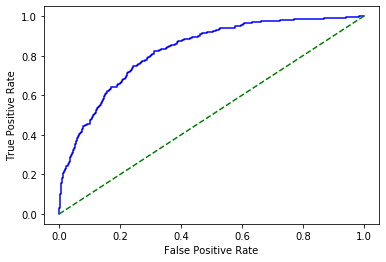

In [20]:
plot_roc(logic, y_test, X_test)

In [21]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf=RandomForestClassifier(n_estimators=100,criterion='gini', 
                          oob_score=False,
                          max_features=2,min_samples_leaf=3,
                          random_state=0)

In [23]:
clf_report(rf, X_train, y_train, X_test, y_test)

Accuracy :  0.6230334914452257


Precision Score :  0.0028623792755503386


Sensitivity/Recall Score/TPR :  0.8938906752411575


Specificity :  0.6227053140096618 

FPR :  0.3772946859903382 

F1-Score :  0.005706485482331448


Classification Error :  0.3769665085547743 

Confusion Matrix : 
 [[159836  96844]
 [    33    278]]


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.62      0.77    256680
           1       0.00      0.89      0.01       311

    accuracy                           0.62    256991
   macro avg       0.50      0.76      0.39    256991
weighted avg       1.00      0.62      0.77    256991



ROC AUC Score :  0.7582979946254097


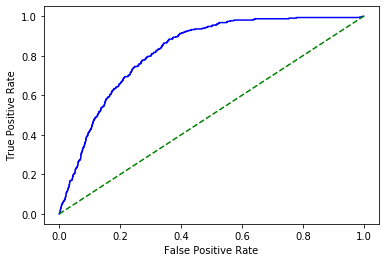

In [24]:
plot_roc(rf, y_test, X_test)

In [52]:
clf_report(rf, X_train, y_train, X_test, y_test)

Accuracy :  0.6607702215252674


Precision Score :  0.0027931681853564723


Sensitivity/Recall Score/TPR :  0.7845659163987139


Specificity :  0.6606202275206483 

FPR :  0.3393797724793517 

F1-Score :  0.005566518758483808


Classification Error :  0.33922977847473257 

Confusion Matrix : 
 [[169568  87112]
 [    67    244]]


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.66      0.80    256680
           1       0.00      0.78      0.01       311

    accuracy                           0.66    256991
   macro avg       0.50      0.72      0.40    256991
weighted avg       1.00      0.66      0.79    256991



ROC AUC Score :  0.7225930719596811


In [25]:
gbtree = GradientBoostingClassifier(learning_rate=0.1, n_estimators = 100)

In [26]:
clf_report(gbtree, X_train, y_train, X_test, y_test)

Accuracy :  0.6381079493056178


Precision Score :  0.0028426766213983825


Sensitivity/Recall Score/TPR :  0.8520900321543409


Specificity :  0.6378486831852891 

FPR :  0.3621513168147109 

F1-Score :  0.005666449274587579


Classification Error :  0.36189205069438224 

Confusion Matrix : 
 [[163723  92957]
 [    46    265]]


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.64      0.78    256680
           1       0.00      0.85      0.01       311

    accuracy                           0.64    256991
   macro avg       0.50      0.74      0.39    256991
weighted avg       1.00      0.64      0.78    256991



ROC AUC Score :  0.7449693576698151


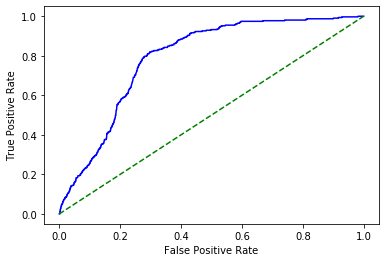

In [27]:
plot_roc(gbtree, y_test, X_test)

In [54]:
clf_report(gbtree, X_train, y_train, X_test, y_test)

Accuracy :  0.5723079796568752


Precision Score :  0.0024152396171936005


Sensitivity/Recall Score/TPR :  0.8553054662379421


Specificity :  0.571965092722456 

FPR :  0.428034907277544 

F1-Score :  0.0048168771786862245


Classification Error :  0.4276920203431248 

Confusion Matrix : 
 [[146812 109868]
 [    45    266]]


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.57      0.73    256680
           1       0.00      0.86      0.00       311

    accuracy                           0.57    256991
   macro avg       0.50      0.71      0.37    256991
weighted avg       1.00      0.57      0.73    256991



ROC AUC Score :  0.713635279480199


In [28]:
xgb_clf = xgb.XGBClassifier(n_estimators=300,
                     subsample=0.9,
                            n_jobs=-1)

In [29]:
clf_report(xgb_clf, X_train, y_train, X_test, y_test)

Accuracy :  0.521963804179913


Precision Score :  0.002306917503330409


Sensitivity/Recall Score/TPR :  0.9131832797427653


Specificity :  0.5214897927380396 

FPR :  0.47851020726196036 

F1-Score :  0.004602208736094118


Classification Error :  0.47803619582008705 

Confusion Matrix : 
 [[133856 122824]
 [    27    284]]


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.52      0.69    256680
           1       0.00      0.91      0.00       311

    accuracy                           0.52    256991
   macro avg       0.50      0.72      0.35    256991
weighted avg       1.00      0.52      0.68    256991



ROC AUC Score :  0.7173365362404024


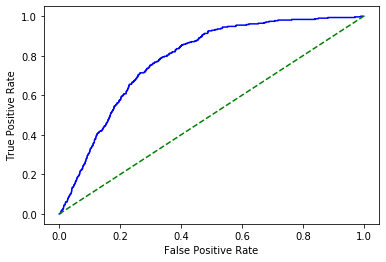

In [30]:
plot_roc(xgb_clf, y_test, X_test)

In [56]:
clf_report(xgb_clf, X_train, y_train, X_test, y_test)

Accuracy :  0.6085699499204252


Precision Score :  0.0025891572838648877


Sensitivity/Recall Score/TPR :  0.8392282958199357


Specificity :  0.6082904784167056 

FPR :  0.3917095215832944 

F1-Score :  0.00516238775268009


Classification Error :  0.39143005007957477 

Confusion Matrix : 
 [[156136 100544]
 [    50    261]]


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.61      0.76    256680
           1       0.00      0.84      0.01       311

    accuracy                           0.61    256991
   macro avg       0.50      0.72      0.38    256991
weighted avg       1.00      0.61      0.76    256991



ROC AUC Score :  0.7237593871183206


In [31]:
knn = KNeighborsClassifier(n_neighbors =5, n_jobs=-1)

In [32]:
clf_report(knn, X_train, y_train, X_test, y_test)

Accuracy :  0.7353059056542837


Precision Score :  0.003519422814658396


Sensitivity/Recall Score/TPR :  0.7717041800643086


Specificity :  0.7352618045815802 

FPR :  0.2647381954184198 

F1-Score :  0.007006890108606796


Classification Error :  0.26469409434571634 

Confusion Matrix : 
 [[188727  67953]
 [    71    240]]


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.74      0.85    256680
           1       0.00      0.77      0.01       311

    accuracy                           0.74    256991
   macro avg       0.50      0.75      0.43    256991
weighted avg       1.00      0.74      0.85    256991



ROC AUC Score :  0.7534829923229444


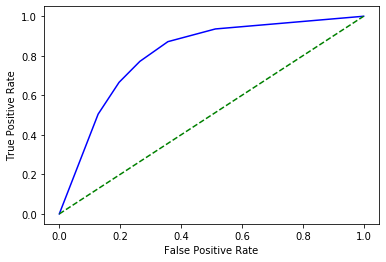

In [33]:
plot_roc(knn, y_test, X_test)